In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GeneratePathsHWEuler(paths, steps, T, P0T, lambd, eta):
    dt = 0.0001
    f0T = lambda t: -(np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    
    r0 = f0T(0.00001)
    theta = lambda t: 1/lambd * (f0T(t+dt)-f0T(t-dt))/(2*dt) + f0T(t) + \
    eta**2/(2*lambd**2)*(1-np.exp(-2*lambd*t))
    
    Z = np.random.normal(0,1,[paths,steps])
    W = np.zeros([paths, steps+1])
    R = np.zeros([paths, steps+1])
    R[:,0]=r0
    time = np.zeros([steps+1])
    
    dt = T/float(steps)
    for i in range(0, steps):
        #making sure the samples from normal have mean 0 and var 1
        if paths>1:
            Z[:,i] = (Z[:,i]-np.mean(Z[:,i]))/np.std(Z[:,i])
        W[:,i+1] = W[:,i]+np.power(dt,0.5)*Z[:,i]
        R[:,i+1] = R[:,i]+lambd*(theta(time[i])-R[:,i])*dt+eta*(W[:,i+1]-W[:,i])
        time[i+1]= time[i]+dt
        
    #Outputs
    paths = {"time": time, "R": R}
    return paths

In [3]:
def F0T(t,P0T):
    dt=0.01
    expr = -(np.log(P0T(t+dt))-np.log(P0T(t-dt)))/(2*dt)
    return expr

In [4]:
def GeneratePathsHWEulerMC(paths, steps, T, P0T, lambd, eta): 
    r0 = F0T(0.01,P0T)
    theta = lambda t: 1/lambd * (F0T(t+dt,P0T)-F0T(t-dt,P0T))/(2*dt) + F0T(t,P0T) + \
    eta**2/(2*lambd**2)*(1-np.exp(-2*lambd*t))
    
    Z = np.random.normal(0,1,[paths,steps])
    W = np.zeros([paths, steps+1])
    R = np.zeros([paths, steps+1])
    M = np.zeros([paths, steps+1])
    M[:,0]=1
    R[:,0]=r0
    time = np.zeros([steps+1])
    
    dt = T/float(steps)
    for i in range(0, steps):
        #making sure the samples from normal have mean 0 and var 1
        if paths>1:
            Z[:,i] = (Z[:,i]-np.mean(Z[:,i]))/np.std(Z[:,i])
        W[:,i+1] = W[:,i]+np.power(dt,0.5)*Z[:,i]
        R[:,i+1] = R[:,i]+lambd*(theta(time[i])-R[:,i])*dt+eta*(W[:,i+1]-W[:,i])
        M[:,i+1] = M[:,i] * np.exp((R[:,i+1]+R[:,i])*0.5*dt)
        time[i+1]= time[i]+dt
        
    #Outputs
    paths = {"time": time, "R": R, "M":M}
    return paths

In [5]:
def HW_theta(lambd, eta, P0T):
    dt = 0.01
    theta = lambda t: 1/lambd * (F0T(t+dt,P0T)-F0T(t-dt,P0T))/(2*dt)+F(t,P0T)+eta**2/(2*lambd**2)*(1-np.exp(-2*lambd*t))
    return theta

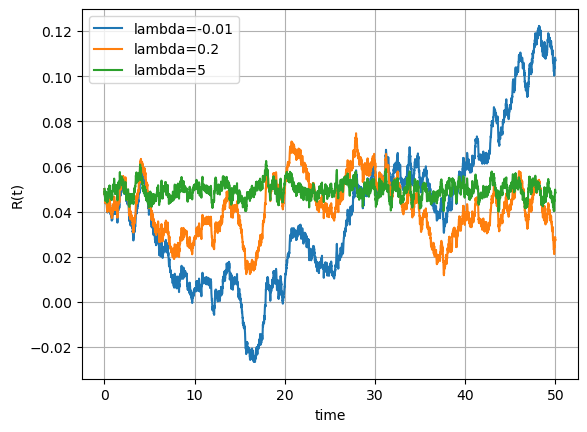

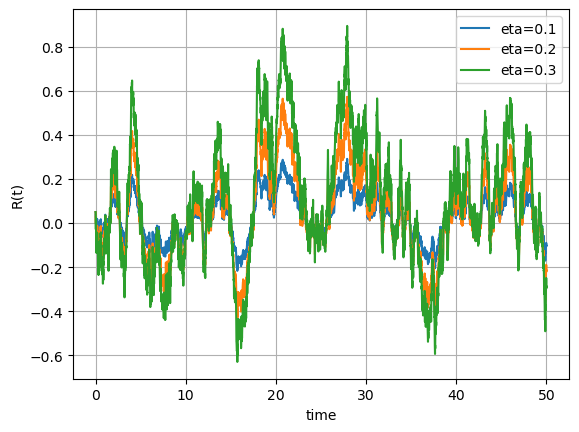

<Figure size 500x500 with 0 Axes>

In [6]:
def mainCalculation():
    paths = 1
    steps = 5000
    T = 50
    lambd = 0.5
    eta = 0.01
    
    # We define a ZCB curve (obtained from the market)
    P0T = lambda T: np.exp(-0.05*T) 
    
    #effect of the mean reversion lambd
    plt.figure(1)
    legend = []
    lambdVec = [-0.01,0.2,5]
    for lambdTemp in lambdVec:
        np.random.seed(2)
        Paths = GeneratePathsHWEuler(paths, steps, T, P0T, lambdTemp, eta)
        legend.append('lambda={0}'.format(lambdTemp))
        timeGrid = Paths["time"]
        R = Paths["R"]
        plt.plot(timeGrid, np.transpose(R))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("R(t)")
    plt.legend(legend)
    
    #effect of volatility
    plt.figure(2)    
    legend = []
    etaVec = [0.1, 0.2, 0.3]
    for etaTemp in etaVec:
        np.random.seed(2)
        Paths = GeneratePathsHWEuler(paths, steps,T,P0T, lambd, etaTemp)
        legend.append('eta={0}'.format(etaTemp))
        timeGrid = Paths["time"]
        R = Paths["R"]
        plt.plot(timeGrid, np.transpose(R))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("R(t)")
    plt.legend(legend)
    plt.figure(figsize=(5, 5))
    

mainCalculation()

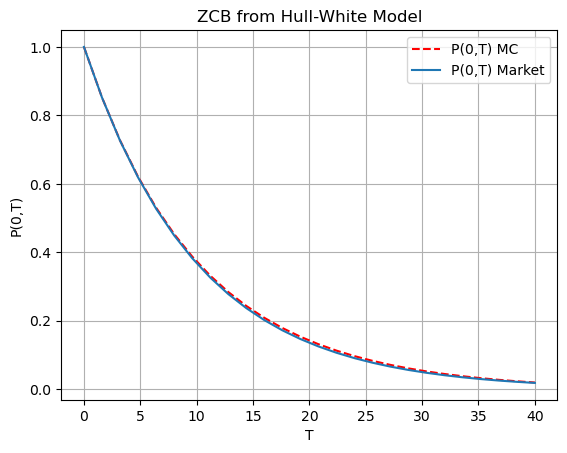

In [7]:
def mainCalculationMC():
    paths = 25000
    steps = 25
    
    lambd = 0.02
    eta = 0.02
    
    #Define ZCB curve
    P0T = lambda T: np.exp(-0.1*T)
    
    #Compare ZCB from market with Monte Carlo
    "Monte Carlo Part"
    T = 40
    Paths = GeneratePathsHWEulerMC(paths,steps,T,P0T,lambd,eta)
    M = Paths["M"]
    ti = Paths["time"]
    
    #Compare price of option on ZCB from Monte Carlo to market
    P_tMC = np.zeros([steps+1])
    for i in range(0,len(P_tMC)):
        P_tMC[i]=np.mean(1/M[:,i])
        
    plt.figure(3)
    plt.grid()
    plt.xlabel("T")
    plt.ylabel("P(0,T)")
    plt.plot(ti,P_tMC, '--r')
    plt.plot(ti, P0T(ti))
    plt.legend(['P(0,T) MC', 'P(0,T) Market'])
    plt.title("ZCB from Hull-White Model")
    
mainCalculationMC()